## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import numpy as np
from scipy.io.wavfile import read
from Experiments.declippingExperiment.declippingExperiment import declipping_experiment


# Set up seaborn
sns.set()

# Set up matplotlib
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 200

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_127641/3381700452.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [24]:
from Problems.generateDeclippingProblem import generateDeclippingProblem
from scipy.io.wavfile import read

# Read the audio data from the .wav file
_, x = read('tmp/declip/male01_8kHzEst20.4.wav')
# Convert the audio data to float
x = x.astype(float)
print('x.shape = ', x.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'Data/shortTest/male01_8kHz.wav'

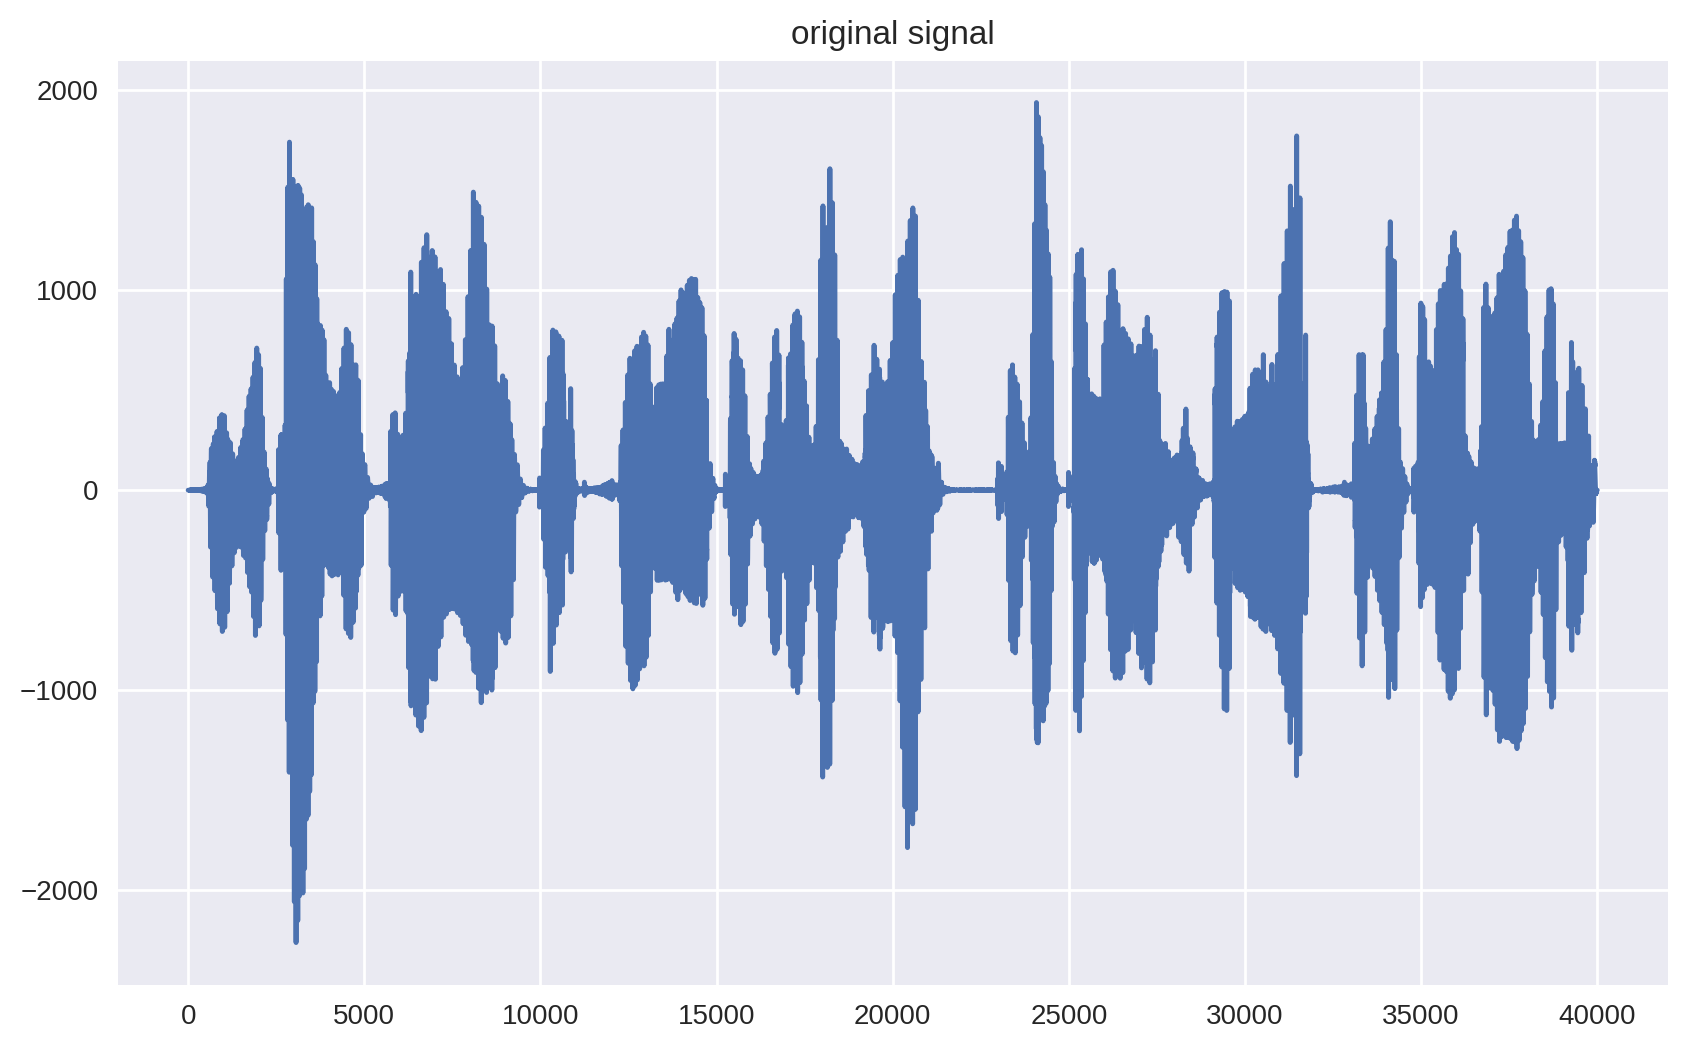

In [23]:
# plot the data
plt.figure()
plt.plot(x)
plt.title('original signal')
plt.show()


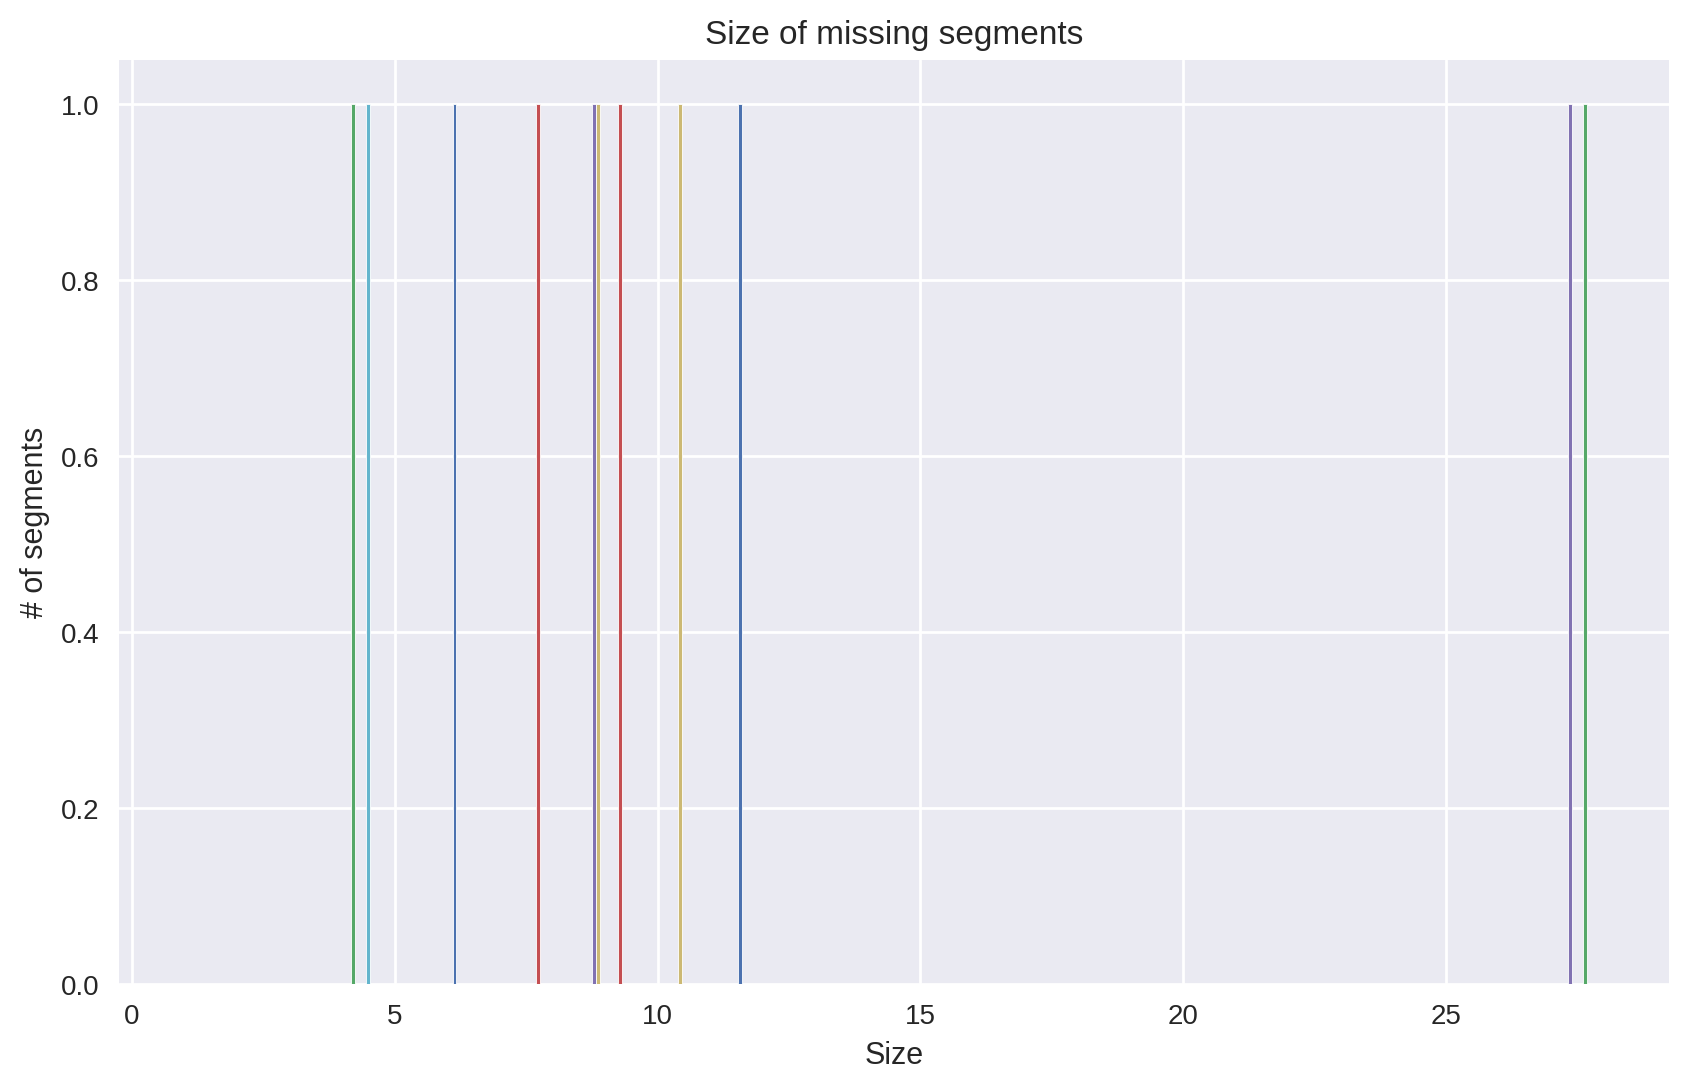

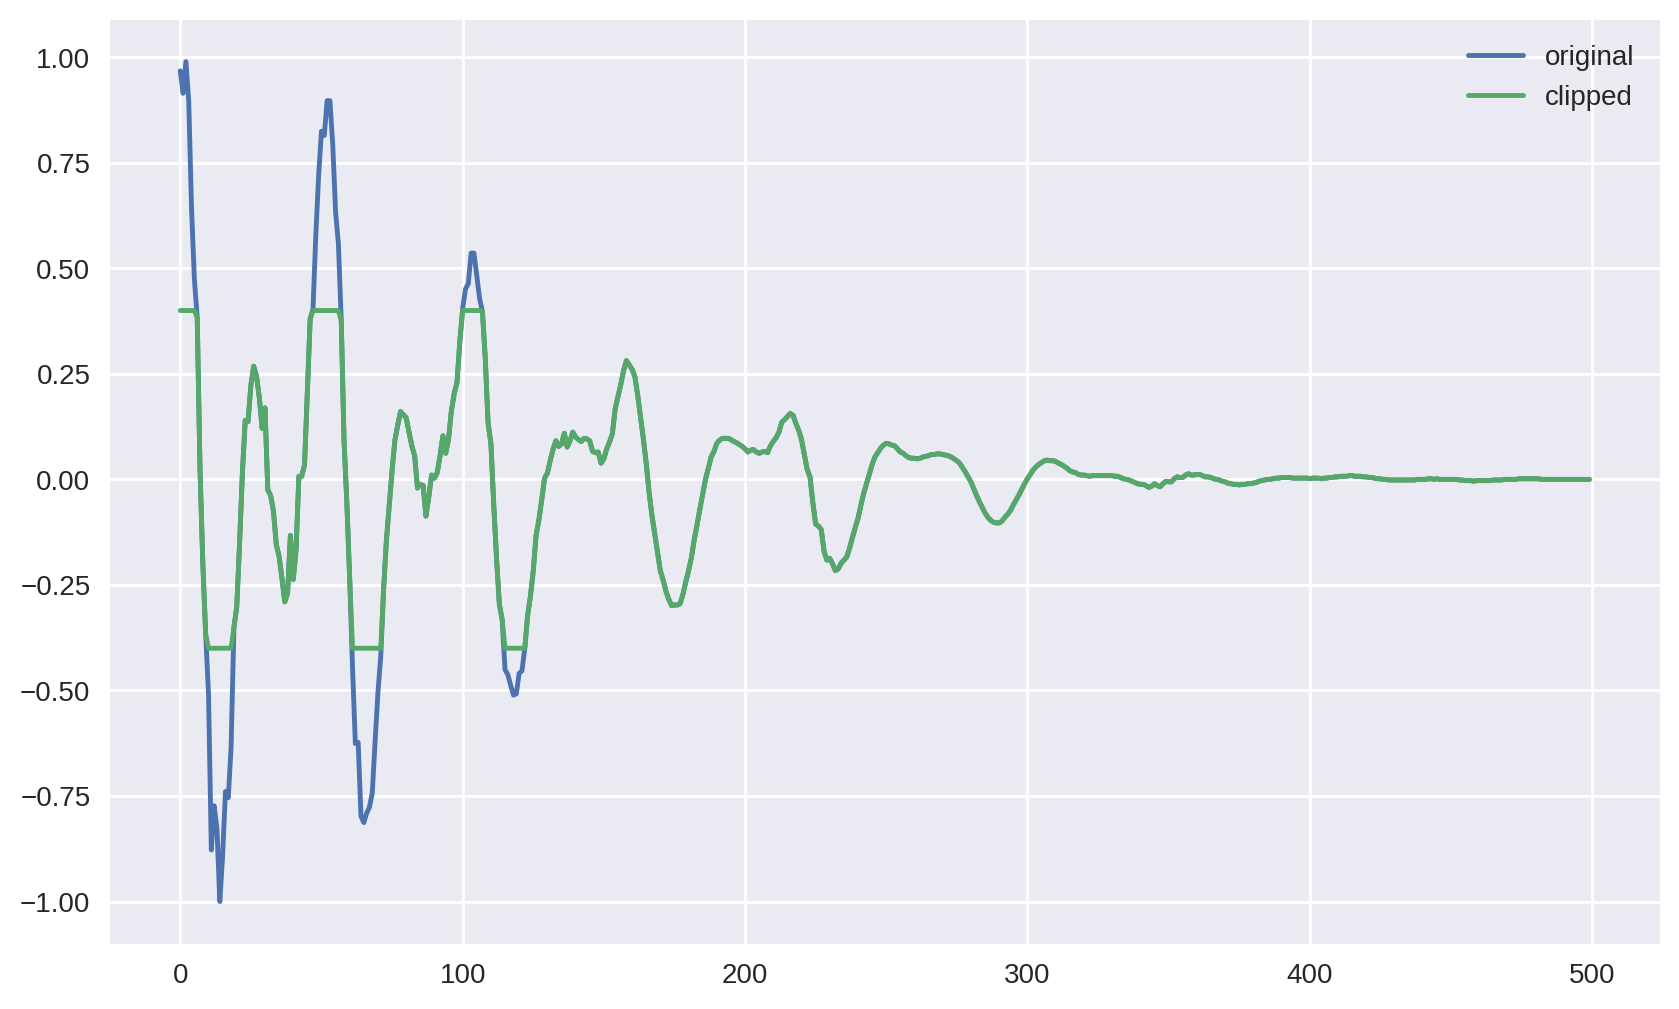

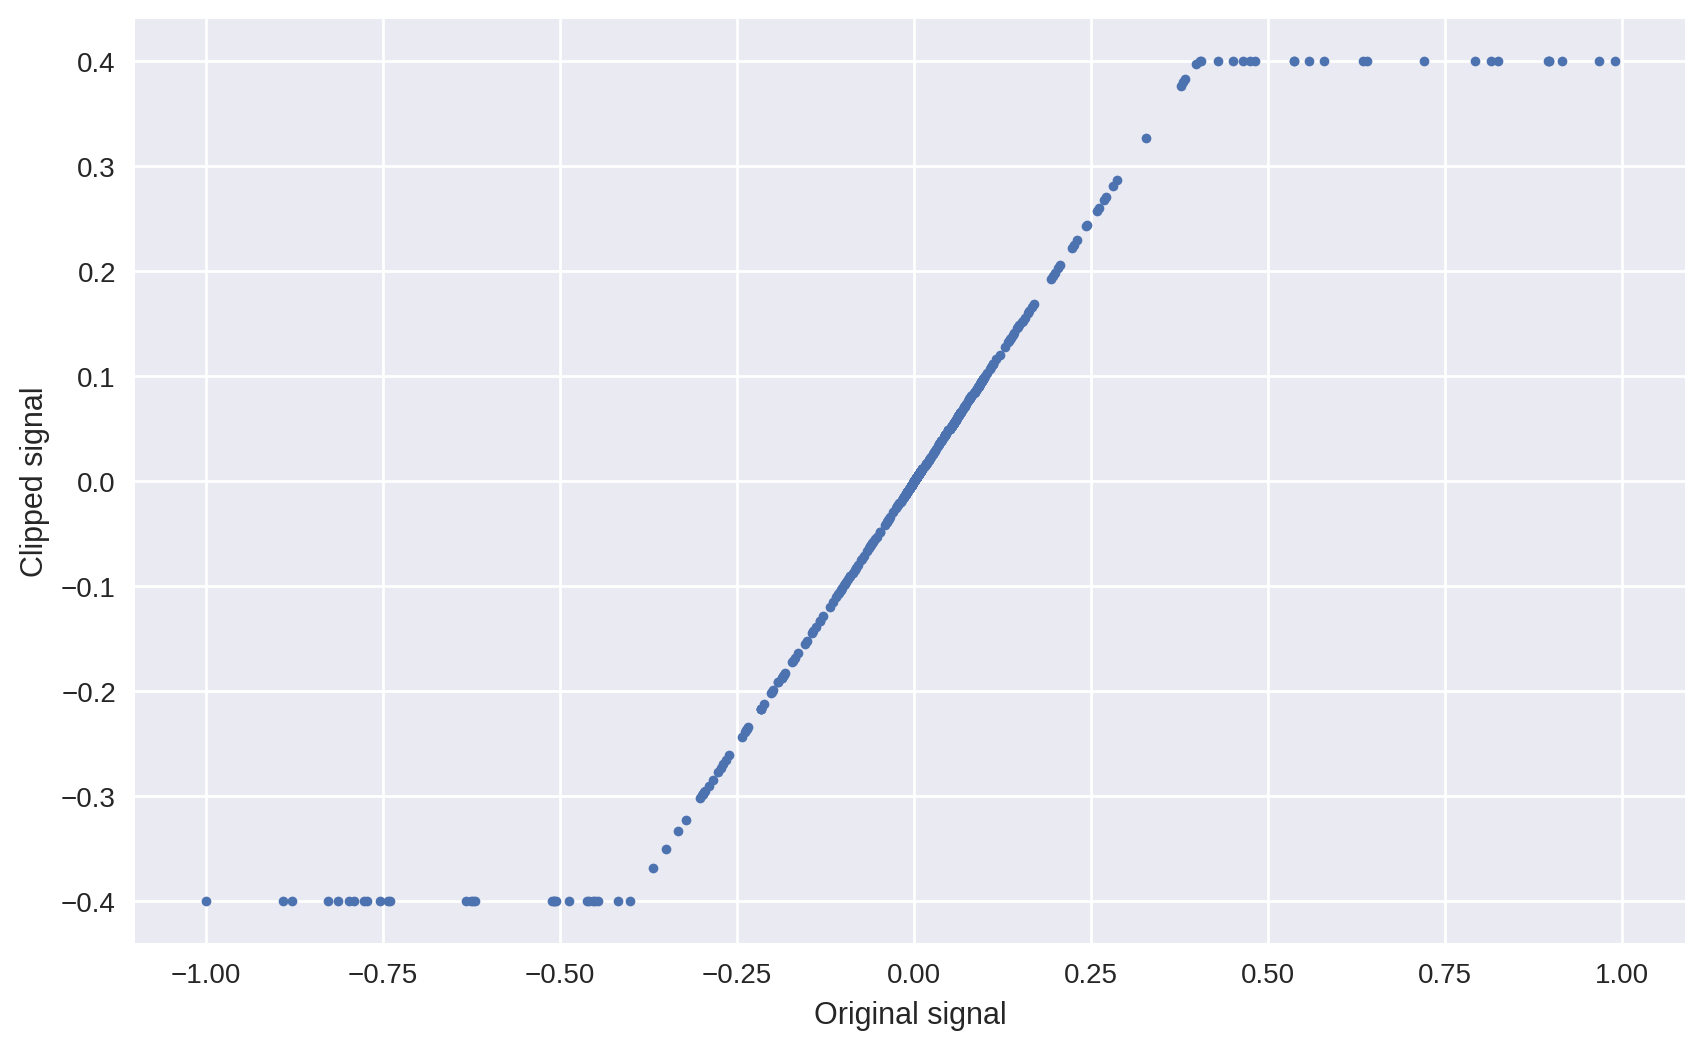

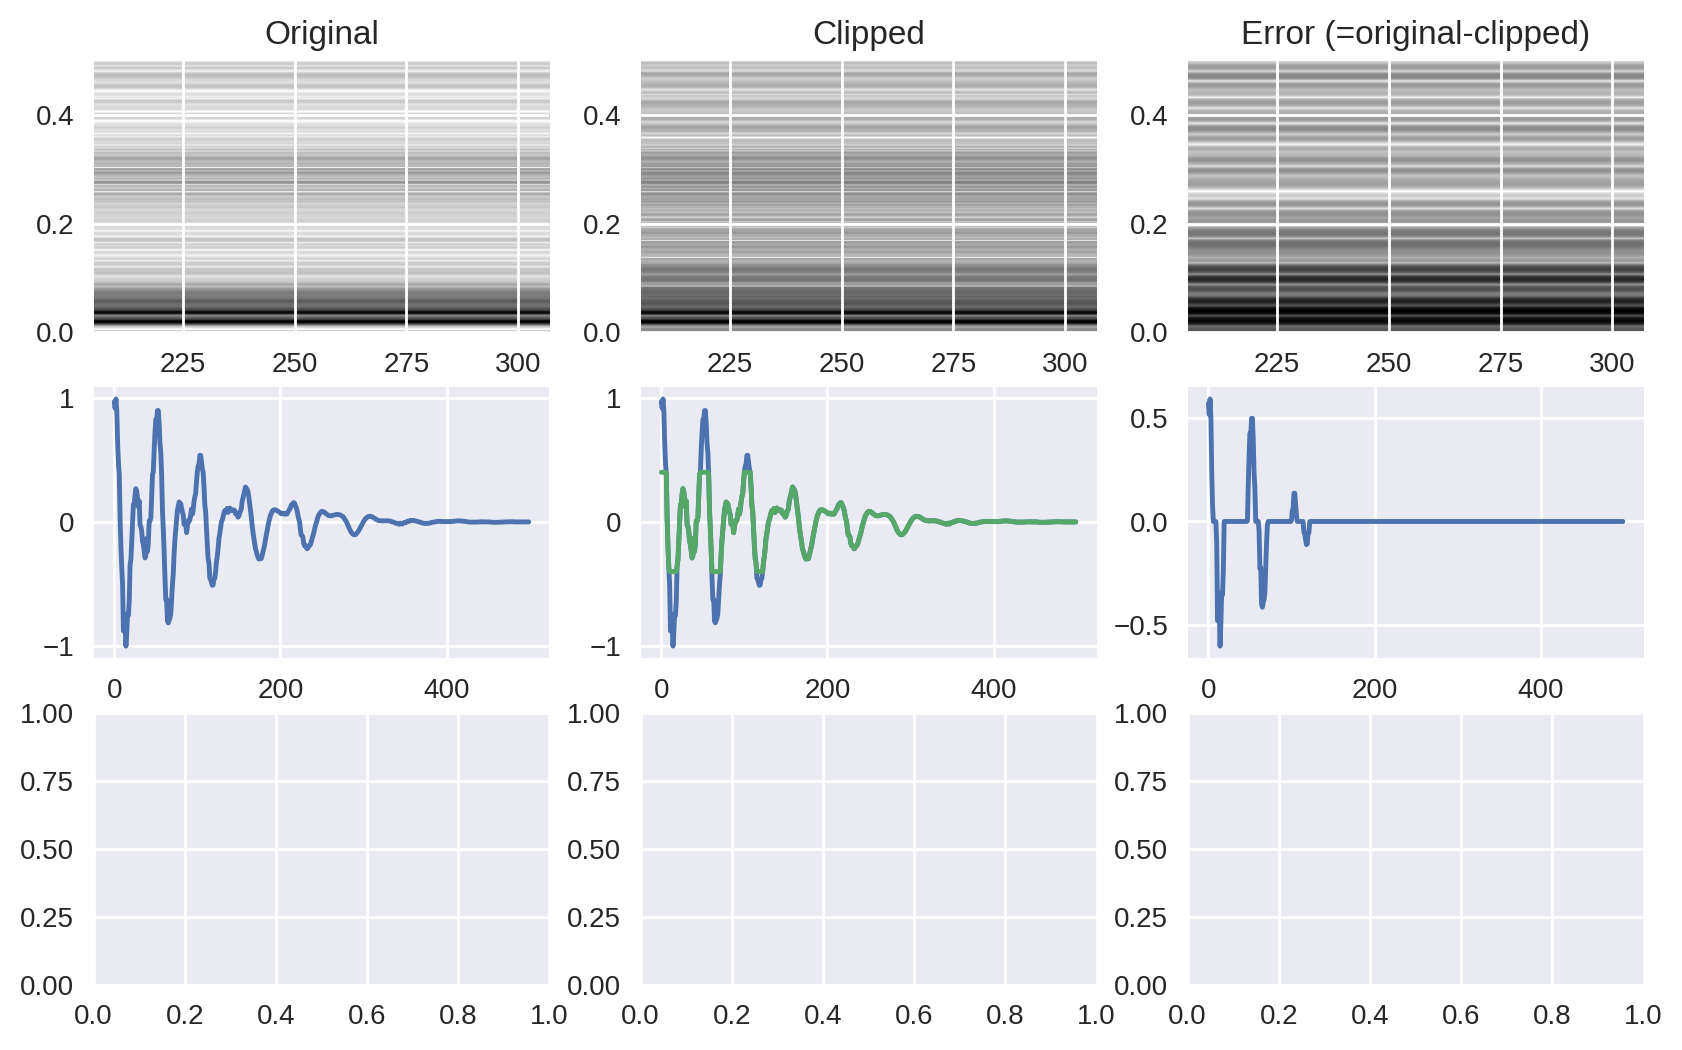

In [6]:
clippingLevel = 0.4  # adjust this value as needed

# Call the generateDeclippingProblem function
problemData, solutionData = generateDeclippingProblem(x[2000:2500], clippingLevel, GR=True)


Folder Data/shortTest/
 File Data/shortTest/music02_16kHz.wav
  Clip level 0.2
server:  <function inpaintFrame_janssenInterpolation at 0x7ff533fd0b80>
[7.344824184558904, -262.51357981760265] [5.912449820029838, -263.9459541821317]


server:  <function inpaintFrame_OMP_Gabor at 0x7ff533e0a840>
[7.344824184558904, 3.165130013007513] [5.912449820029838, 1.7327556484784459]


server:  <function inpaintFrame_OMP at 0x7ff5341d3920>
[7.344824184558904, 2.8115479210860856] [5.912449820029838, 1.3791735565570202]


  Clip level 0.4
server:  <function inpaintFrame_janssenInterpolation at 0x7ff533fd0b80>
[14.286376149173828, 13.323854534049849] [9.708070143292776, 8.745548528168799]


server:  <function inpaintFrame_OMP_Gabor at 0x7ff533e0a840>
[14.286376149173828, 9.107803394712555] [9.708070143292776, 4.529497388831504]


server:  <function inpaintFrame_OMP at 0x7ff5341d3920>
[14.286376149173828, 7.773763790502403] [9.708070143292776, 3.195457784621351]


  Clip level 0.6000000000000001
server

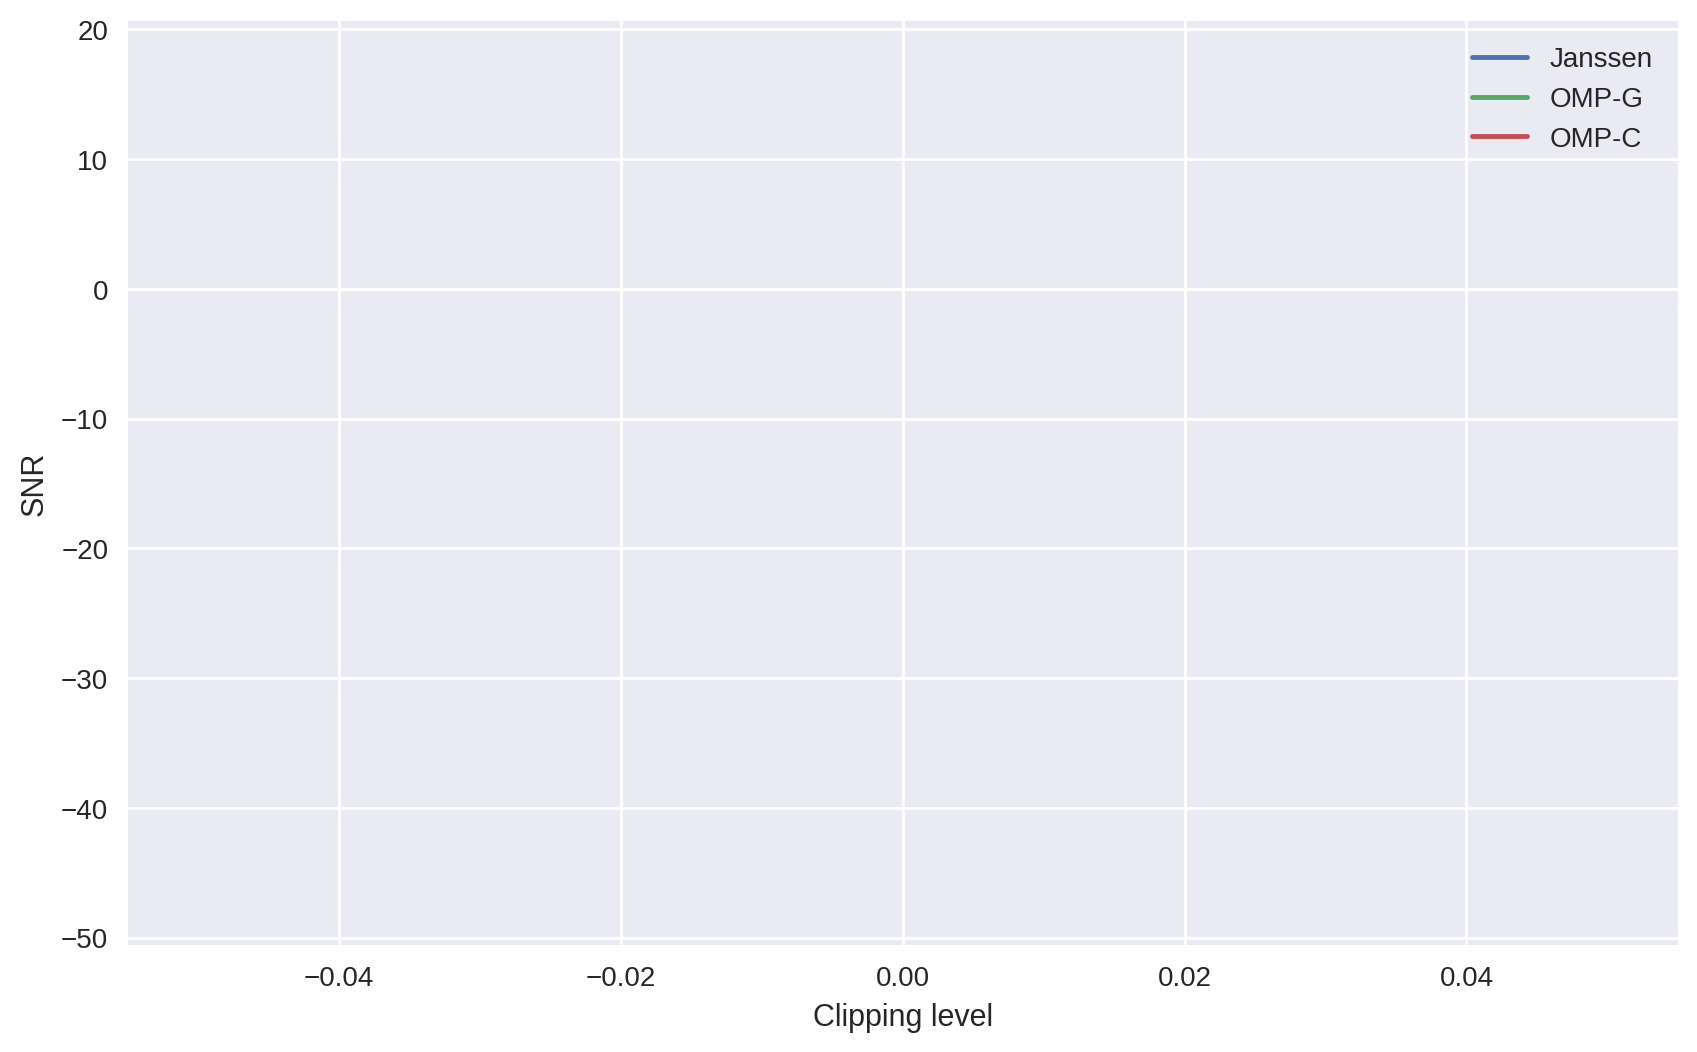

In [18]:
SNRClip, average_SNR = declipping_experiment()

[-262.51357982   13.32385453   26.24934631   33.48424014]
[ 3.16513001  9.10780339 22.34704536 34.87304578]
[ 2.81154792  7.77376379 14.41363747 25.30643841]


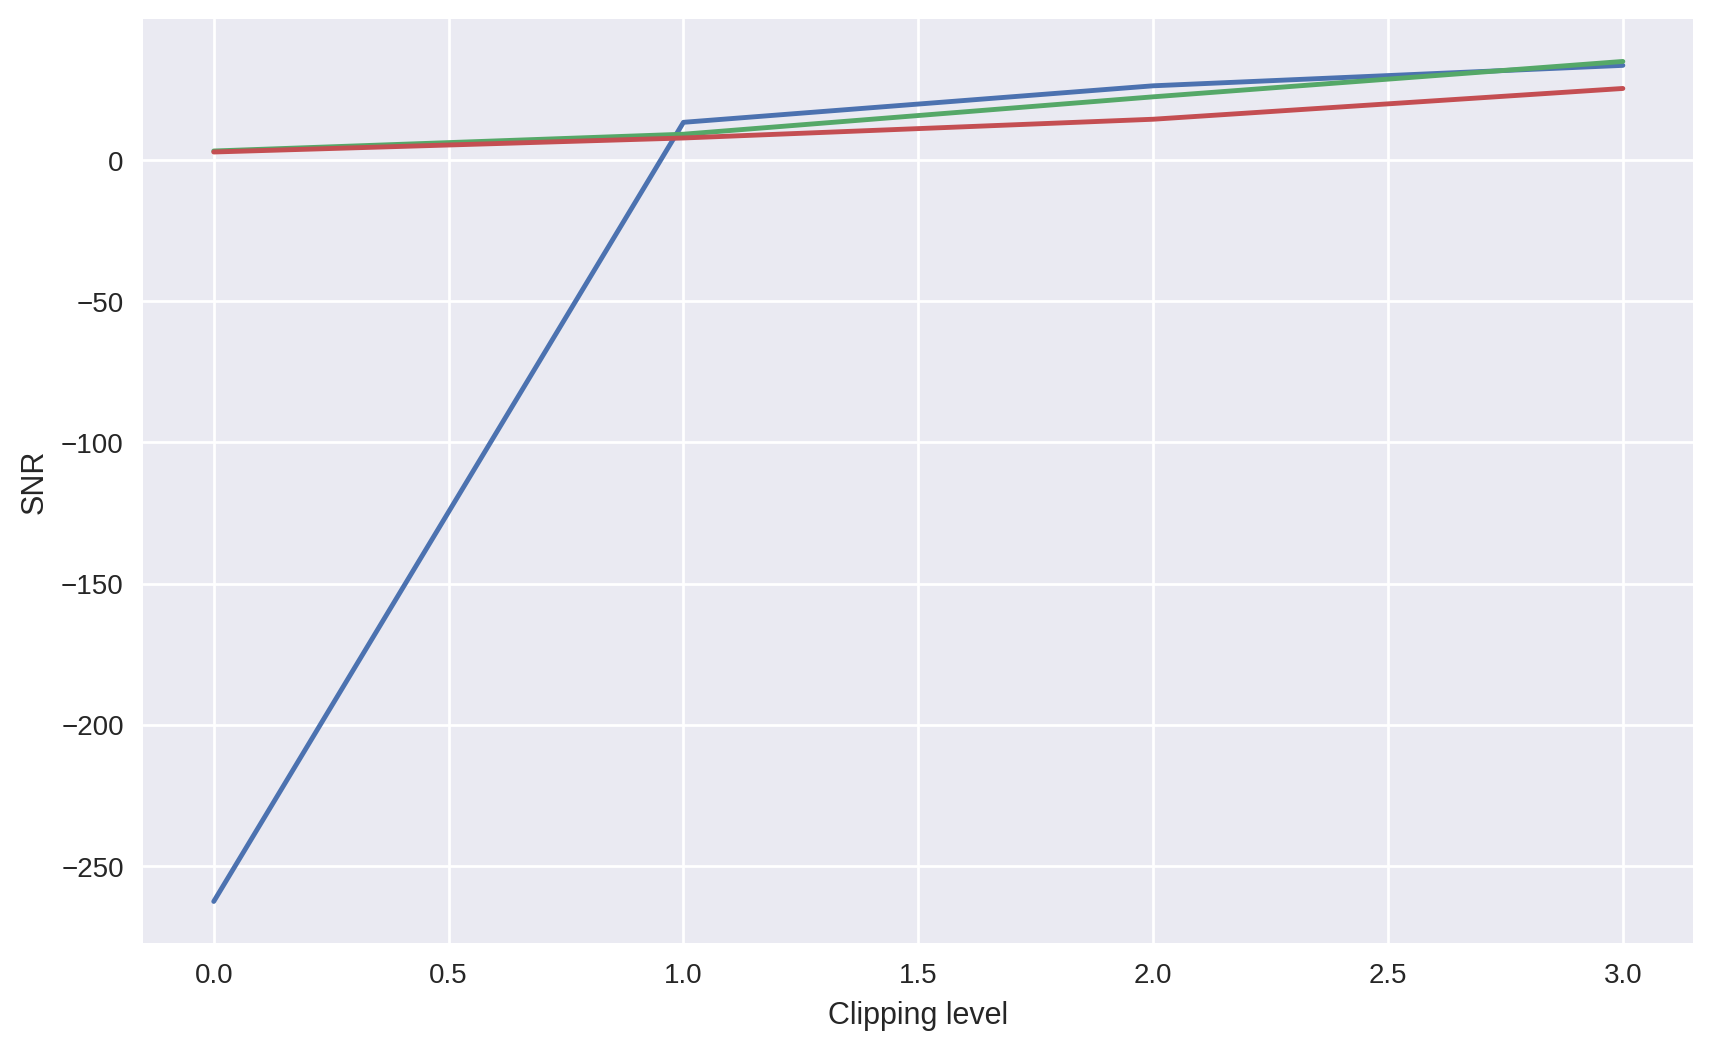

In [19]:
# Compute the average SNR over all sound files
average_SNR = np.mean(SNRClip, axis=0)

# Plot the results
plt.figure()
for i in range(average_SNR.shape[1]):
    plt.plot(average_SNR[:, i])
plt.xlabel('Clipping level')
plt.ylabel('SNR')
plt.show()
